In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Collection

In [179]:
stats = pd.read_csv(r"/Users/ronnierfranz28/Downloads/master.csv")
stats.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 2. Data Cleaning and Pre-Processing

In [180]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [181]:
stats.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [28]:
stats.columns = stats.columns.str.replace("_", " ")
stats.columns = stats.columns.str.title()
stats

,Country,Year,Sex,Age,Suicides No,Population,Suicides/100K Pop,Country-Year,Hdi For Year,Gdp For Year ($),Gdp Per Capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [29]:
stats.isnull().any()  # Check if there are any missing values

Country               False
Year                  False
Sex                   False
Age                   False
Suicides No           False
Population            False
Suicides/100K Pop     False
Country-Year          False
Hdi For Year           True
 Gdp For Year ($)     False
Gdp Per Capita ($)    False
Generation            False
dtype: bool

In [30]:
stats["Hdi For Year"] = stats["Hdi For Year"].fillna(stats["Hdi For Year"].mean())

In [31]:
stats.isnull().any()  # Check if there are any missing values after filling with mean values

Country               False
Year                  False
Sex                   False
Age                   False
Suicides No           False
Population            False
Suicides/100K Pop     False
Country-Year          False
Hdi For Year          False
 Gdp For Year ($)     False
Gdp Per Capita ($)    False
Generation            False
dtype: bool

In [32]:
stats.columns

Index(['Country', 'Year', 'Sex', 'Age', 'Suicides No', 'Population',
       'Suicides/100K Pop', 'Country-Year', 'Hdi For Year',
       ' Gdp For Year ($) ', 'Gdp Per Capita ($)', 'Generation'],
      dtype='object')

In [33]:
stats.rename(columns = {" Gdp For Year ($) ":"Gdp For Year ($)"}, inplace = True)

In [34]:
stats["Gdp For Year ($)"] = stats["Gdp For Year ($)"].str.replace(",", "")

In [35]:
stats["Gdp For Year ($)"] = abs(stats["Gdp For Year ($)"].astype("int32"))

In [89]:
data = stats[['Country', 'Year', 'Age', 'Suicides No', 'Population',
       'Suicides/100K Pop', 'Hdi For Year',
       'Gdp For Year ($)', 'Gdp Per Capita ($)', 'Generation']]


### 2. Data Analysis and Visualization (EDA)

In [94]:
stats[['Year', 'Suicides No', 'Population',
       'Suicides/100K Pop', 'Hdi For Year',
       'Gdp For Year ($)', 'Gdp Per Capita ($)']].corr().style.background_gradient(cmap = "RdYlGn", axis = 1)

,Year,Suicides No,Population,Suicides/100K Pop,Hdi For Year,Gdp For Year ($),Gdp Per Capita ($)
Year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.047764,0.339134
Suicides No,-0.004546,1.000000,0.616162,0.306604,0.062669,-0.007599,0.061330
Population,0.008850,0.616162,1.000000,0.008285,0.057279,-0.016323,0.081510
Suicides/100K Pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.004306,0.001785
Hdi For Year,0.209036,0.062669,0.057279,0.037290,1.000000,-0.005645,0.505505
Gdp For Year ($),0.047764,-0.007599,-0.016323,0.004306,-0.005645,1.000000,-0.013490
Gdp Per Capita ($),0.339134,0.061330,0.081510,0.001785,0.505505,-0.013490,1.000000


Text(2015, 280, 'Highest Suicide Case')

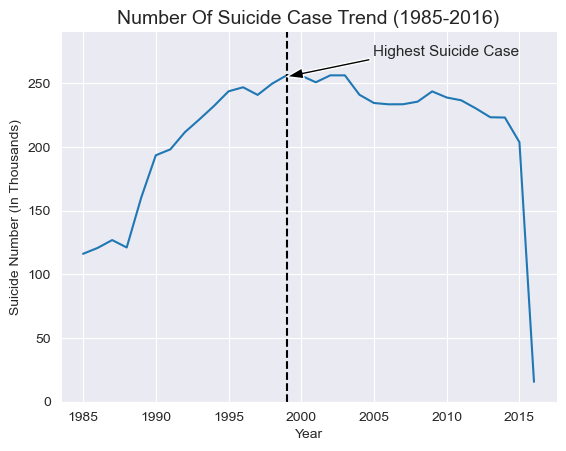

In [230]:
total_suicide = data.groupby("Year")[["Suicides No"]].sum()
total_suicide

sns.set_style("darkgrid")



fig, ax = plt.subplots()

ax.plot(total_suicide.index, total_suicide["Suicides No"] / 1000);
ax.axvline(1999, c="black", ls="--")

ax.set_xlabel("Year");
ax.set_ylabel("Suicide Number (In Thousands)");
ax.set_title("Number Of Suicide Case Trend (1985-2016)", fontsize = 14);
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylim(0, 290)
ax.annotate('Highest Suicide Case', xy = (1999, 255), xytext = (2015, 280),
            arrowprops=dict(facecolor='black', width = 2, headwidth = 8),
            fontsize=11,
            horizontalalignment='right', verticalalignment='top')


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.8, 0.9, 'asasdw')

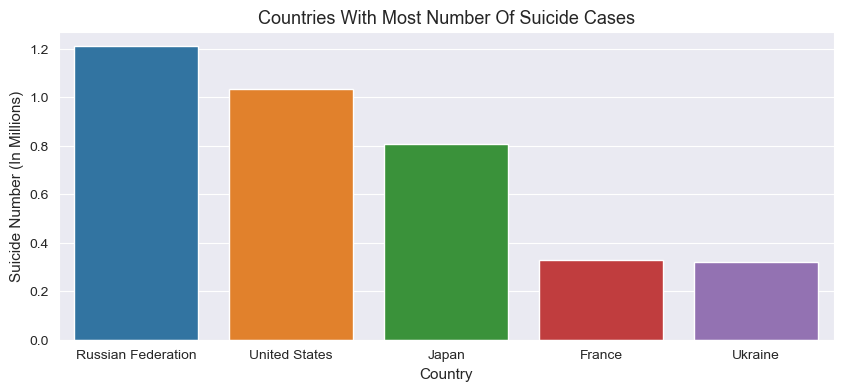

In [186]:
suicide_country = data.groupby("Country")[["Suicides No"]].sum().sort_values(by="Suicides No", ascending = False).head()
suicide_country

fig, ax = plt.subplots(figsize = (10, 4))
sns.barplot(x=suicide_country.index, y=suicide_country["Suicides No"] / 1000000, data = suicide_country);
ax.set_title("Countries With Most Number Of Suicide Cases", fontsize = 13);
ax.set_xlabel("Country", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 6.5)

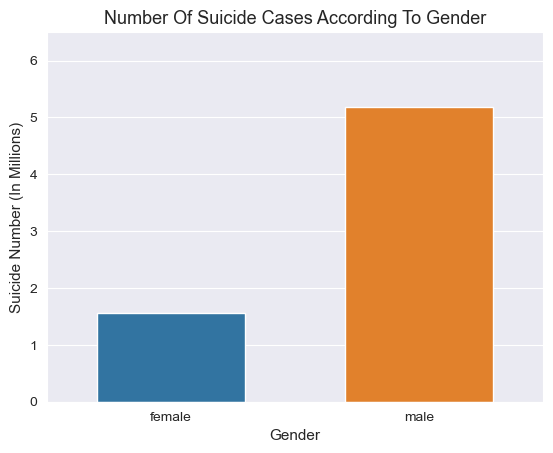

In [46]:
suicide_sex= data.groupby("Sex")[["Suicides No"]].sum()
suicide_sex

fig, ax = plt.subplots()
sns.barplot(x=suicide_sex.index, y=suicide_sex["Suicides No"] / 1000000, data = suicide_sex, width = 0.6);
ax.set_title("Number Of Suicide Cases According To Gender", fontsize = 13);
ax.set_xlabel("Gender", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);
ax.set_ylim(0, 6.5)

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0, 0.5, 'Suicides Number (In Millions)')

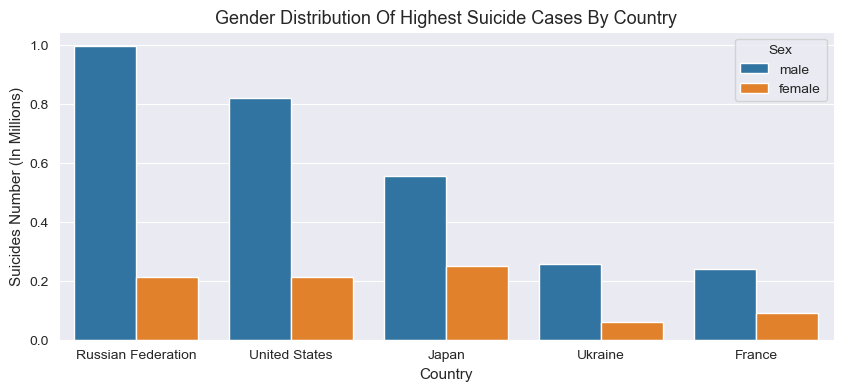

In [51]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_sex_country = data.loc[data["Country"].isin(countries)].groupby(["Country", "Sex"])[["Suicides No"]].sum().reset_index().sort_values(by = "Suicides No", ascending = False)
suicide_sex_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_sex_country, x = suicide_sex_country["Country"], y = suicide_sex_country["Suicides No"] / 1000000, hue = suicide_sex_country["Sex"])
ax.set_title("Gender Distribution Of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11) 


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 2.75)

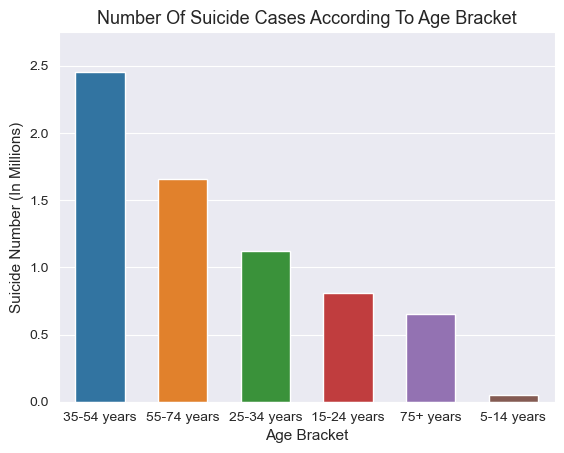

In [52]:
age_suicide = data.groupby("Age")[["Suicides No"]].sum().sort_values(by="Suicides No", ascending = False)
age_suicide

fig, ax = plt.subplots()
sns.barplot(x=age_suicide.index, y=age_suicide["Suicides No"] / 1000000, data = suicide_sex, width = 0.6);
ax.set_title("Number Of Suicide Cases According To Age Bracket", fontsize = 13);
ax.set_xlabel("Age Bracket", fontsize = 11);
ax.set_ylabel("Suicide Number (In Millions)", fontsize = 11);
ax.set_ylim(0, 2.75)
 

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0, 0.5, 'Suicides Number (In Millions)')

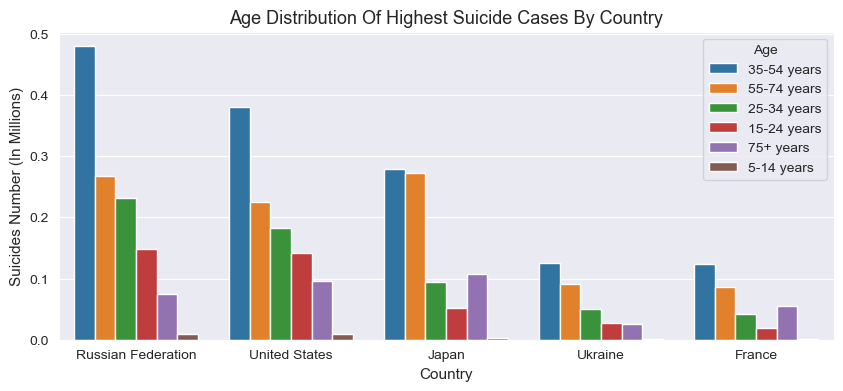

In [53]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_age_country = data.loc[data["Country"].isin(countries)].groupby(["Country", "Age"])[["Suicides No"]].sum().reset_index().sort_values(by = "Suicides No", ascending = False)
suicide_age_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_age_country, x = suicide_age_country["Country"], y = suicide_age_country["Suicides No"] / 1000000, hue = suicide_age_country["Age"])
ax.set_title("Age Distribution Of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11) 

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


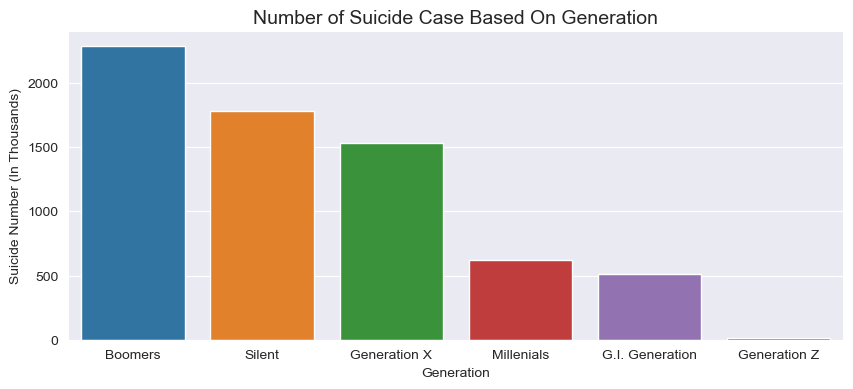

In [55]:
generation_suicides = data.groupby("Generation")[["Suicides No"]].sum().sort_values(by = "Suicides No", ascending = False)
generation_suicides 

ig, ax = plt.subplots(figsize = (10,4))

sns.barplot(x = generation_suicides.index, y= generation_suicides["Suicides No"] / 1000, data = generation_suicides );
ax.set_xlabel("Generation");
ax.set_ylabel("Suicide Number (In Thousands)");
ax.set_title("Number of Suicide Case Based On Generation", fontsize = 14);
ax.spines[["top", "right"]].set_visible(False)

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

Text(0, 0.5, 'Suicides Number (In Millions)')

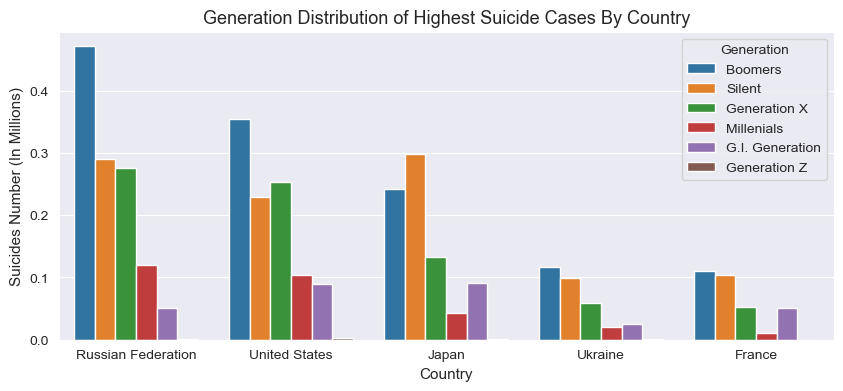

In [56]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
suicide_generation_country = data.loc[data["Country"].isin(countries)].groupby(["Country", "Generation"])[["Suicides No"]].sum().reset_index().sort_values(by = "Suicides No", ascending = False)
suicide_generation_country 


fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = suicide_generation_country, x = suicide_generation_country["Country"], y = suicide_generation_country["Suicides No"] / 1000000, hue = suicide_generation_country["Generation"])
ax.set_title("Generation Distribution of Highest Suicide Cases By Country", fontsize = 13)
ax.set_xlabel("Country", fontsize = 11) 
ax.set_ylabel("Suicides Number (In Millions)", fontsize = 11) 

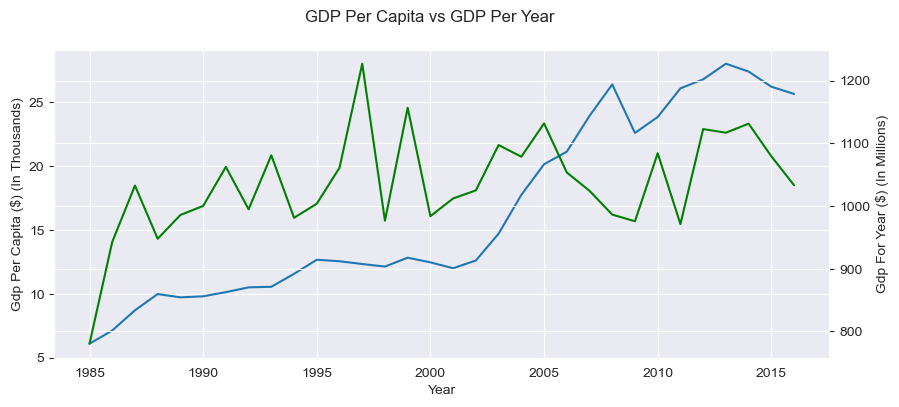

In [51]:
gdp_capita = data.groupby("Year")[["Gdp Per Capita ($)"]].mean()
gdp_capita


fig, ax = plt.subplots(sharex = "all", figsize = (10,4))

ax.plot(gdp_capita.index, gdp_capita["Gdp Per Capita ($)"] / 1000);
ax.set_xlabel("Year");
ax.set_ylabel("Gdp Per Capita ($) (In Thousands)");

ax2 = ax.twinx()

ax2.plot(gdp_capita_year.index, gdp_capita_year["Gdp For Year ($)"] / 1000000, color = "green");
ax2.set_ylabel("Gdp For Year ($) (In Millions)");

fig.suptitle("GDP Per Capita vs GDP Per Year");


/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


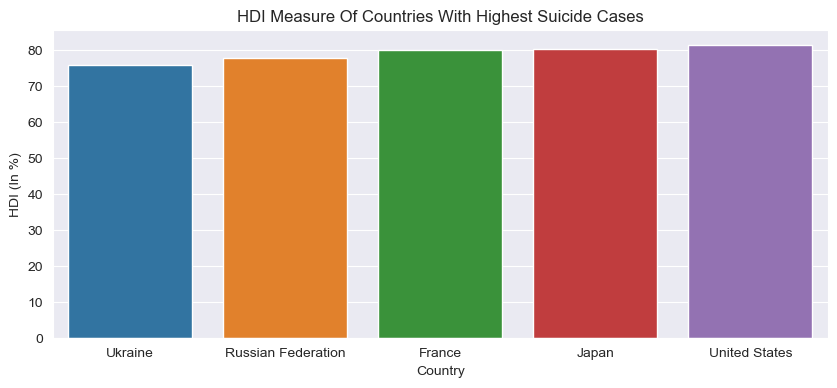

In [62]:
countries = ["Russian Federation", "United States", "Japan", "France", "Ukraine"]
HDI_suicide = data.loc[data["Country"].isin(countries)].groupby("Country")[["Hdi For Year"]].mean().sort_values(by = "Hdi For Year", ascending = True).head()
HDI_suicide

fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data = HDI_suicide, x = HDI_suicide.index, y = HDI_suicide["Hdi For Year"]*100);
ax.set_xlabel("Country");
ax.set_ylabel("HDI (In %)");
ax.set_title("HDI Measure Of Countries With Highest Suicide Cases");

/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ronnierfranz28/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


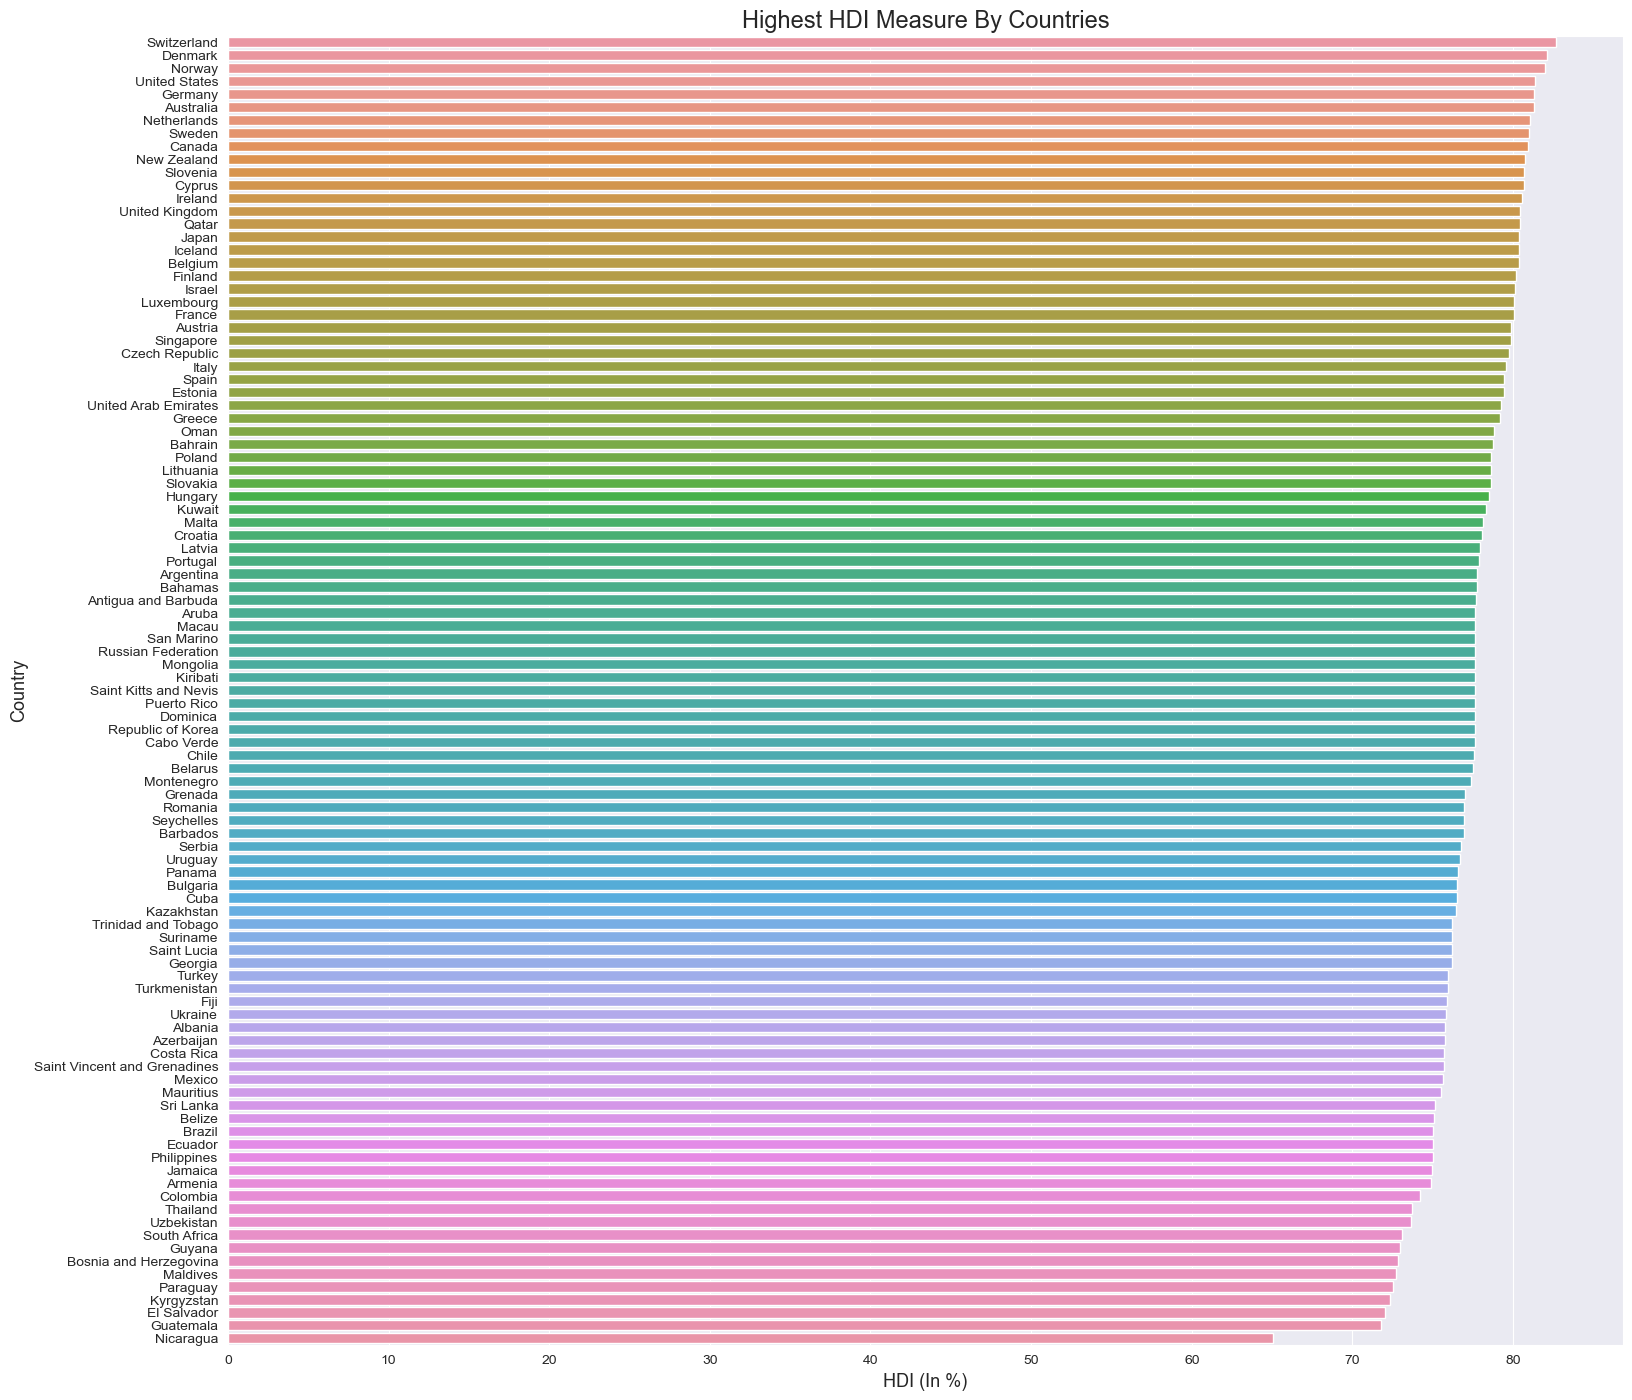

In [69]:
HDI= data.groupby("Country")[["Hdi For Year"]].mean().sort_values(by = "Hdi For Year", ascending = False)
HDI

fig, ax = plt.subplots(figsize = (18, 17))

sns.barplot(y = HDI.index, x = HDI["Hdi For Year"]*100, data = HDI);
ax.set_xlabel("HDI (In %)", fontsize = 13);
ax.set_ylabel("Country", fontsize = 13);
ax.set_title("Highest HDI Measure By Countries", fontsize = 17);




In [70]:
data.head()

,Country,Year,Sex,Age,Suicides No,Population,Suicides/100K Pop,Hdi For Year,Gdp For Year ($),Gdp Per Capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,2138342396,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,2138342396,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,2138342396,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,2138342396,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,2138342396,796,Boomers


Text(0.5, 1.0, 'Suicides/100k Population Case Trend (1985-2015)')

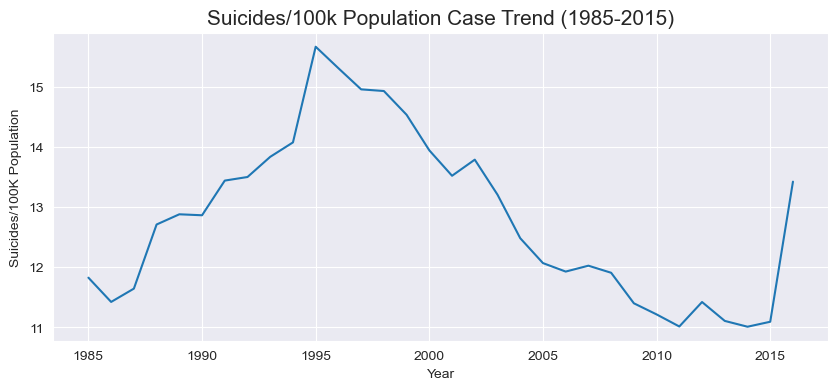

In [83]:
suicide_ratio = data.groupby("Year")[["Suicides/100K Pop"]].mean()
suicide_ratio


fig, ax = plt.subplots(sharex = "all", figsize = (10,4))

ax.plot(suicide_ratio.index, suicide_ratio["Suicides/100K Pop"]);
ax.set_xlabel("Year", fontsize = 10);
ax.set_ylabel("Suicides/100K Population", fontsize = 10);
ax.set_title("Suicides/100k Population Case Trend (1985-2015)", fontsize = 15)

In [95]:
data.head()

,Country,Year,Age,Suicides No,Population,Suicides/100K Pop,Hdi For Year,Gdp For Year ($),Gdp Per Capita ($),Generation
0,Albania,1987,15-24 years,21,312900,6.71,0.776601,2138342396,796,Generation X
1,Albania,1987,35-54 years,16,308000,5.19,0.776601,2138342396,796,Silent
2,Albania,1987,15-24 years,14,289700,4.83,0.776601,2138342396,796,Generation X
3,Albania,1987,75+ years,1,21800,4.59,0.776601,2138342396,796,G.I. Generation
4,Albania,1987,25-34 years,9,274300,3.28,0.776601,2138342396,796,Boomers


Text(0.5, 1.0, 'Relationship of HDI vs GDP Per Capita')

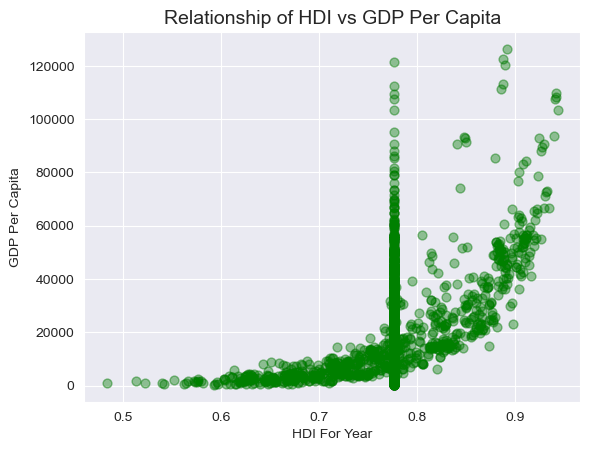

In [127]:
fig, ax = plt.subplots()


ax.scatter(x=data["Hdi For Year"], y=data["Gdp Per Capita ($)"], alpha = 0.04, s = 40, color = "green")
ax.set_xlabel("HDI For Year", fontsize = 10);
ax.set_ylabel("GDP Per Capita", fontsize = 10);
ax.set_title("HDI vs GDP Per Capita", fontsize = 14)

### 4. Conclusion 
#### From 1985 to 2016, there is a decrease trend in suicide cases. The highest suicide cases was on 1999. For suicide number per 100k population, year 1995 was the highest ratio. Russian Federation was the country with the highest suicide cases recorded. Male gender with age bracket of 35-54 years was its dominant charateristics. There was no relationship among HDI, GDP, GDP Per Capita and Suicide Number meaning the measure of standard of living of a country has nothing to do with the person commiting a suicide. 